### Install Biopython, pandas, and seaborn

%%bash 
allows this to interperet a bash command, which in this case will be "conda install biopython" in order to install biopython. Convert the cell to python and run if any of these are needed.

%%bash 
conda install biopython
conda install pandas
conda install seaborn


In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Data import CodonTable
import pandas as pd
import math
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import seaborn
from matplotlib import pyplot as plt

# Functions

## Create Function 1 

This defines a function called get_sequences_from_file that takes a "fasta_fn" file as input.


* The next line creates and empty dictionary object called seequence_data_dict
* SeqIO is a tool in biopython that is able to read various bioinfomatics formats and write them to a biopython object.  In this case we are designating a fasta format, and creating a seq record object for each fasta entry which are iterated through in the loop. https://biopython.org/wiki/SeqIO
* The next line will take the discription section of each fasta record and seperate it by white space into elements. These elements are then assigned to a list called description. https://www.w3schools.com/python/ref_string_split.asp
* Next line indexes out element 1 adds a space and then adds element 2 of the list.  This concatenates genus and species into the species name.  I'm also surprised that the + can work like that in python.
* The last bit creates the dictionary by saying for each record, the species name just created is the key, and the corresponding value is the nucleotide sequence. https://eeob-biodata.github.io/BCB546X-python/06-biopython/
* in the last line, the function uses return to give the dictionary, sequence_data_dict, and an output.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq   
    return(sequence_data_dict)


## Create Function 2 

This function takes a string of nucleotides and outputs the translated mitochondrial protein, (assuming start postion is 1 and that this is the coding strand.

* First line imports the table and assigns it the name mito_table
* Apparently the forward table dictionary does not include stop codons, so I had to add them in to avoid key errors in the next 4 lines.
* then I create an empty object aa_sequence that will later hold the translated sequence.
* The for loop figures out how many nucleotide triplets are possible in the nucleotide string, and loops through them
* For each possible triplet, the code slices indexes out the three bases for that triplet and assigns them to the variable codon
* using the biopython forward_table dictionary, we translate a codon to it's corresponding amino acid
* If the codon is a stop, the program will return the current saved amino acid sequence
* Otherwise, the code will increment the amino acid sequence, by adding the amino acid for the current codon.
* at the end of the loop/string the fuction returns the amino acid sequence. (assuming it has not already stopped due to a stop codon)

https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi#SG2 codon table info
https://www.freecodecamp.org/news/how-to-round-numbers-up-or-down-in-python/ rounding
https://www.w3schools.com/python/python_conditions.asp How to set up the conditionals
https://biopython.org/docs/1.75/api/Bio.Data.CodonTable.html information about how the tables for biopython work(not all that helpful).

In [3]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    mito_table.forward_table["AGG"] = "*"
    mito_table.forward_table["TAA"] = "?"
    mito_table.forward_table["TAG"] = "?"
    mito_table.forward_table["AGA"] = "?"
    aa_sequence = ""
    for tripletx in range(1,math.floor(len(string_nucleotides)/3)):
        codon = string_nucleotides[3*(tripletx)-3:3*(tripletx)]
        amino_acid = mito_table.forward_table[codon]
        if amino_acid == "*" or amino_acid == "?":
            return(aa_sequence)
        else :
            aa_sequence += amino_acid
    return(aa_sequence)      

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"])

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

## Define Function 3 

This function accomplishes the same things as above, although I call it define instead of create since it is already basically pre-built.  All this really does is modify the syntax.

* The one line of code of consequence turns the string into a biopython sequence object and then translates it.  There are two options used in the translate fuction, to_stop=TRUE stops the translation once a stop condon is found, and table="Vertebrate Miochondrial" makes sure it uses the correct codon table for our gene.


https://biopython-tutorial.readthedocs.io/en/latest/notebooks/03%20-%20Sequence%20Objects.html

In [5]:
def prefab_translate(string_nucleotides):
    aa_sequence = print(Seq.translate(string_nucleotides, table="Vertebrate Mitochondrial", to_stop=True))
    return(aa_sequence)

## Create Function 4

* surprised that ProteinAnalysis take a string as an input and not some kind of seq object

https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html
https://biopython.org/docs/1.75/api/Bio.html#submodules 

In [6]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(str(aa_seq))
    weight = analysed_seq.molecular_weight()
    return(weight)                                    


## Create Function 5

* sets a variable called gc_count to zero
* sets up a for loop to iterate through each nucleotide
* indexes out a nucleotide, and checks if it equals G or C
* if yes, it adds 1 to GC count
* after the loop is run, it will return the number of Gs and Cs divided by the length of the sequence to give GC content


In [7]:
def gc_content(nucleotide_sequence):
    gc_count = 0
    for i in range(0,len(str(nucleotide_sequence))-1):
        if nucleotide_sequence[i] == "G" or nucleotide_sequence[i] == "C":
            gc_count += 1
    return(gc_count/len(nucleotide_sequence))
        

# 6 Add Empty Columns to dataframe

* The most important thing about this is just knowing how pandas indexing works

https://eeob-biodata.github.io/BCB546X-python/04-more-dataframes/

In [9]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)


penguins_df['molecular_weight'] = "NaN"
penguins_df['GC_content'] = "NaN"
penguins_df['cytb_dna_sequence'] = "NaN"
penguins_df['Protein_sequence'] = "NaN"

# 7 Add New Calculated Columns

* This is interesting becuase apparently you can loop through a dictionary and save both the key and values as variable.  Much easier than using a while read loop in bash.
* The first 3 lines of the code just use our already established functions to create the needed information from the sequence in our dictionary and temporarily store it
* The last lines of the code use indexing and a conditionally statement to assign the values to the rows with that species name.


https://eeob-biodata.github.io/BCB546X-python/03-starting-with-data/
https://stackoverflow.com/questions/29794959/pandas-add-new-column-to-dataframe-from-dictionary
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy How to avoid chaining Error

In [10]:
for key, value in cytb_seqs.items():
    aa_seq = translate_function(value)
    molweight = compute_molecular_weight(aa_seq)
    percent_gc = gc_content(value)
    dnaseq = str(value)
    penguins_df.loc[penguins_df.species == key, "molecular_weight"] = molweight
    penguins_df.loc[penguins_df.species == key, "GC_content"] = percent_gc
    penguins_df.loc[penguins_df.species == key, "cytb_dna_sequence"] = dnaseq
    penguins_df.loc[penguins_df.species == key, "Protein_sequence"] = aa_seq


In [11]:
penguins_df

,species,mass,molecular_weight,GC_content,cytb_dna_sequence,Protein_sequence
0,Aptenodytes forsteri,28.00,42459.6021,0.483815,ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTA...,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938,ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTA...,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
2,Eudyptes chrysocome,2.80,42475.5753,0.511811,ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCA...,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186,ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCA...,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
4,Eudyptes sclateri,4.25,42475.5753,0.508311,ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCA...,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
5,Eudyptula minor,1.60,42491.6408,0.492563,ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCA...,MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQI...
6,Pygoscelis adeliae,4.60,42458.614,0.490814,ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTA...,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
7,Pygoscelis antarctica,4.10,42404.5423,0.476815,ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCA...,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
8,Pygoscelis papua,6.10,42595.8759,0.470691,ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCA...,MAPNLRKSHPLLKMINKSLIDLPTPPNISAWWNFGSLLGICLITQI...
9,Spheniscus demersus,3.20,42431.549,0.48294,ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCA...,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...


# 8  Create a Graph of Penguin Body Mass

* The first section of code builds the graph.
    * Here we where we designate what type of plot we want- barplot.
    * The source of the data- pepnguins_df.
    * X axis - species.
    * Y axis - mass.
    * order allows us to change how the bars in the graph are aranged, I use pandas sort values to sort the species by body mass, so that the graph is easier to read.
    * palette lets us choose a preset list of colors to use.  Here I used the colorblind option, which is probably a good choice for presentations to large groups of people.
* The second section changes some of the aesthetics of the graph.  The major concern was the overlapping bar lables.  Apparently seaborn uses matplot, so we can use some of the matplot settings to get what we would like.
    * plt.xtics in this case refers to the bar labels. roatation is the setting I was most interested in as it was an easy way to prevent overlap. Horizontal alignment "right" keeps them lined up at the top, when rotated 90 degrees.
    * The other three bits just set the respective lables, in this case using the matplot notation since we were already using it.
   


https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/
https://seaborn.pydata.org/tutorial/introduction
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
Asked a friend, Juan Panelo, how to label the axis on the graph since I was having trouble finding a way to rotate the species names so that they were legible.  

<Axes: title={'center': 'Penguin Body Mass by Species'}, xlabel='Species', ylabel='Body Mass [Kg]'>

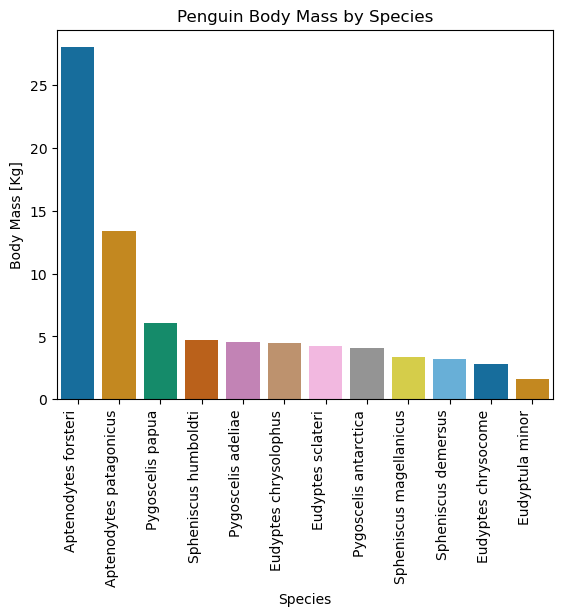

In [12]:
Penguin_mass_plot = seaborn.barplot(
    data = penguins_df,
    x = 'species', 
    y = "mass", 
    order = penguins_df.sort_values('mass', ascending=False).species, 
    palette = "colorblind"
)

plt.xticks(rotation = 90, horizontalalignment = 'right')   # align labels properly below each bar
plt.xlabel('Species')
plt.ylabel("Body Mass [Kg]")
plt.title("Penguin Body Mass by Species")
Penguin_mass_plot

### Q1 the smallest Penguin is Eudyptula minor at 1.6 kg
### Q2 

```
Little Penguins are widely distributed in Australia (from Western Australia along the southern coast of Australia up to New South Wales) and in New Zealand (from Northland to Stewart Island and the Chatham Islands). The White-flippered Penguin (E. m. albosignata) is an endangered subspecies, restricted to Banks Peninsula and Motonau Island (South Island, New Zealand) that has often been treated as a full species. Geographic variation of size, extent of white on the tail and flipper, and colour tone of the back is considerable. Six subspecies have been described: novaehollandia in Australia, iredaei in northern New Zealand, variabilis from Cook Strait, New Zealand, albosignata on Banks Peninsula, minor in the lower part of the South Island, New Zealand, and chathamensis from the Chatham Islands.
```
from: https://www.penguinworld.com/types/little.html

# 9  Create a Scatterplot

* This is basically the same plot we did in class with some minor changes to make it look better

https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/ scatterplot code

Text(0.5, 1.0, 'Penguin Cytochrome B Molecular Mass by GC Content')

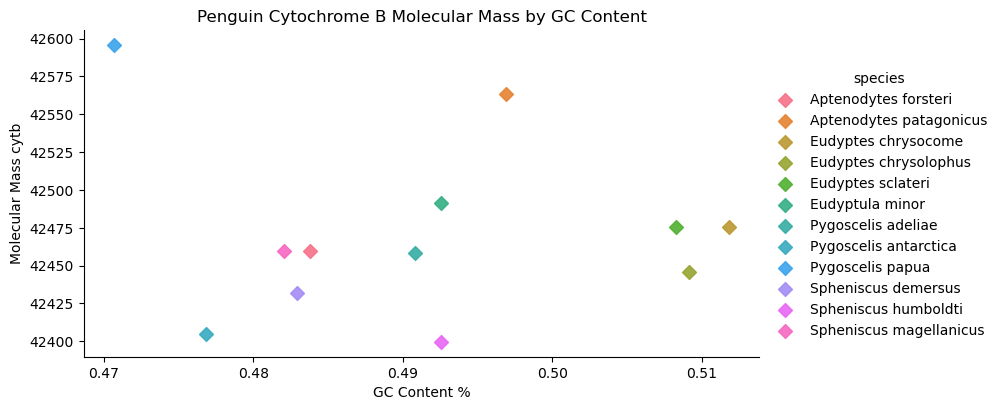

In [13]:

Penguin_gctomass = seaborn.lmplot(x="GC_content", y="molecular_weight", data=penguins_df, 
                    fit_reg=False, height=4, aspect=2,
                    hue = "species",
                    scatter_kws={'alpha':0.9,"s": 50}, 
                    markers='D')
Penguin_gctomass.set_axis_labels('GC Content %', 'Molecular Mass cytb')
plt.title("Penguin Cytochrome B Molecular Mass by GC Content")

In [14]:
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Align import MultipleSeqAlignment

# 10 Write Pandas Dataframe to file

* This one is pretty straight forward and information I used came straight from the documentation.  Index=false tells it not to include row labels.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [15]:
penguins_df.to_csv("penguins_mass_cytb.csv", index = False) 

# 11 Bonus

* I modified the first script to change the record id and name attributes on the seq records to the species name to make sure the labeling in the final tree is labeled properly.
* Followed the documentation throught the steps to get to a final tree. Tracking the correct librarys to import, and following some of the name shortening they used were the most difficult things.

https://biopython.org/docs/1.75/api/Bio.Phylo.html

In [16]:

from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio import Phylo

fastas = []
for record in SeqIO.parse("penguins_cytb.fasta", "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        record.id = species_name
        record.name = species_name
        fastas.append(record)

align = MultipleSeqAlignment(fastas)
calculator = DistanceCalculator("identity")
constructor = DistanceTreeConstructor()
dm = calculator.get_distance(align)
njtree = constructor.nj(dm)
Phylo.draw_ascii(njtree)


                      ____ Spheniscus humboldti
  ___________________|
 |                   |    _ Spheniscus magellanicus
 |                   |___|
 |                       |___ Spheniscus demersus
 |
 |                              _______________ Pygoscelis papua
 |        _____________________|
 |     __|                     |____________________ Pygoscelis antarctica
 |    |  |
 |  __|  |__________________________ Pygoscelis adeliae
_| |  |
 | |  |         ___________________ Aptenodytes forsteri
 | |  |________|
 |_|           |__________________ Aptenodytes patagonicus
 | |
 | |               _______ Eudyptes sclateri
 | |             ,|
 | |_____________||___________ Eudyptes chrysolophus
 |               |
 |               |__________ Eudyptes chrysocome
 |
 |_________________________ Eudyptula minor

